In [1]:
import pandas as pb
import numpy as np

In [2]:
read_csv = pb.read_csv("spam.csv", encoding="ISO-8859-1")

In [3]:
read_csv.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
read_csv = read_csv.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)

In [5]:
read_csv.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
read_csv = read_csv.rename(columns={"v1":"label", "v2":"text"})

In [7]:
read_csv.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
read_csv["lable_num"] = read_csv.label.map({"ham":1, "spam":0})

In [9]:
read_csv.head()

,label,text,lable_num
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test, y_train_num, y_test_num = train_test_split(read_csv["text"],read_csv["label"], read_csv["lable_num"], test_size = 0.2, random_state = 10)

In [12]:
X_train.head()

5281               And how you will do that, princess? :)
1300    Those cocksuckers. If it makes you feel better...
5128    Wot about on wed nite I am 3 then but only til 9!
1808    Aiyo a bit pai seh Ì_ noe... Scared he dun rem...
856                         Going to take your babe out ?
Name: text, dtype: object

In [13]:
y_train

5281     ham
1300     ham
5128     ham
1808     ham
856      ham
1494     ham
1272     ham
2138     ham
633      ham
4508     ham
2068     ham
3746     ham
4326     ham
840      ham
3530     ham
949      ham
3670     ham
977      ham
1510     ham
3742     ham
2553     ham
4027     ham
1707     ham
1931     ham
3460     ham
667      ham
1588     ham
1888     ham
3644    spam
2661     ham
        ... 
3932     ham
653      ham
1406    spam
409      ham
4109     ham
4173     ham
3126     ham
974      ham
5320     ham
574      ham
3435     ham
3416     ham
2102     ham
2443     ham
239     spam
4452     ham
2550     ham
4136     ham
1097     ham
1032     ham
2042     ham
1949     ham
1520    spam
4829     ham
2009     ham
1180     ham
3441    spam
1344     ham
4623     ham
1289     ham
Name: label, Length: 4457, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
conv = CountVectorizer()

In [16]:
conv.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
X_train_df = conv.transform(X_train)
X_test_df = conv.transform(X_test)

In [18]:
ham_words = ''
spam_words = ''
spam = read_csv[read_csv["lable_num"] == 0]
ham = read_csv[read_csv["lable_num"] ==1]

In [19]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to /home/zero/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [21]:
from wordcloud import WordCloud

In [22]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

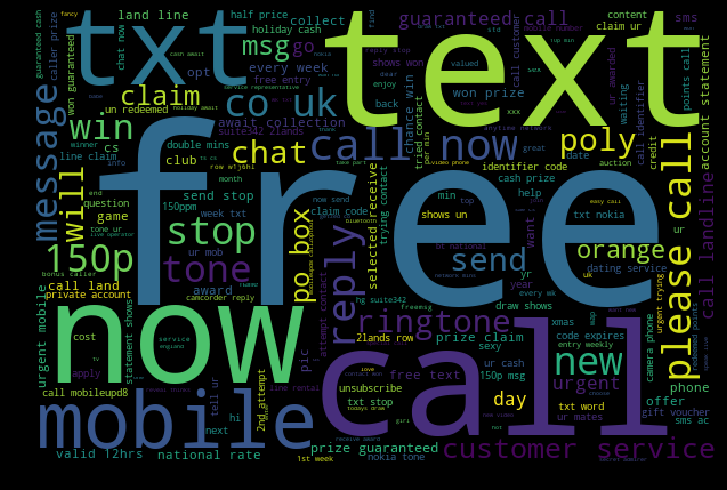

In [23]:
#Spam Word cloud
import matplotlib.pyplot as plt
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## classification using navie_bayes algo

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
nav_clf = MultinomialNB()

In [26]:
nav_clf.fit(X_train_df, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
nav_clf.predict(X_test_df)

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
accuracy_score(y_test, nav_clf.predict(X_test_df))

0.9883408071748879

## using knn classifer

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=5)

In [32]:
knn_clf.fit(X_train_df, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
accuracy_score(y_test, knn_clf.predict(X_test_df))

0.9121076233183857

## using logisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lin_clf = LogisticRegression()

In [36]:
lin_clf.fit(X_train_df, y_train_num)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
accuracy_score(y_test_num, lin_clf.predict(X_test_df))

0.9802690582959641